<a href="https://colab.research.google.com/github/NagaDhanush/Machine_Learning/blob/master/Laso_and_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [5]:
X = diabetes.data
y = diabetes.target

print(X.shape, y.shape)
print(diabetes.DESCR)

(442, 10) (442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more inf

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


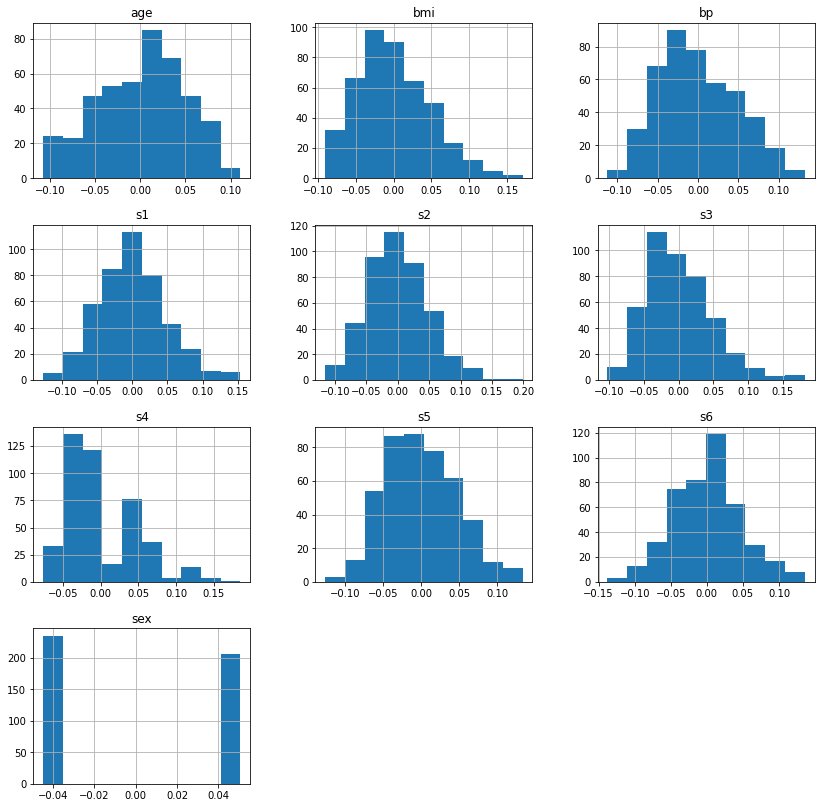

In [7]:
diabetes_df.hist(figsize=(14,14))
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(),
                         Ridge(alpha=0.7))
pipeline.fit(X_train, y_train)
y_hat_train = pipeline.predict(X_train)

In [9]:
ridge_model = Ridge(alpha=0.7, normalize=True)
ridge_model.fit(X_train, y_train)

print(ridge_model.coef_)
print(ridge_model.intercept_)

[  47.62915301 -115.7041973   366.65629652  237.05164429  -21.14856772
  -55.09909262 -171.15599821  128.77583219  278.9803751   111.6106498 ]
151.94896579250712


In [11]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)
print(linear_model.coef_) 
print(linear_model.intercept_)

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
151.3456553477407


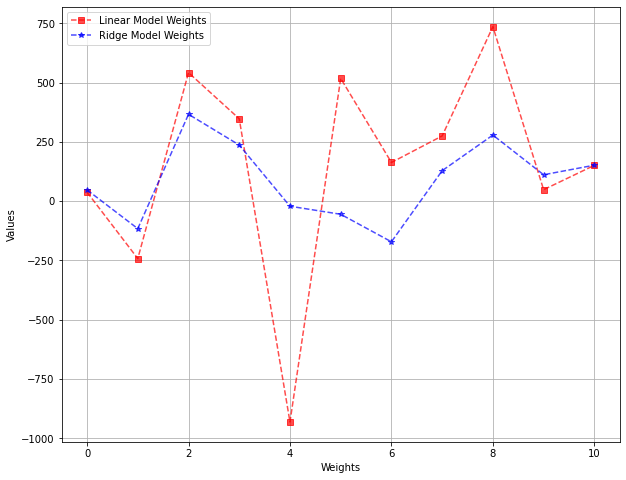

In [17]:
plt.figure(figsize=(10,8))
plt.plot(list(linear_model.coef_) + [linear_model.intercept_], 's--', alpha=0.7, color='red', label='Linear Model Weights')
plt.plot(list(ridge_model.coef_) + [ridge_model.intercept_], '*--', alpha=0.7, color='blue', label='Ridge Model Weights')
plt.grid()
plt.xlabel('Weights')
plt.ylabel('Values')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

print('Training error(MSE) on Linear Model', mean_squared_error(y_train, linear_model.predict(X_train)))
print('Training error(MSE) on Ridge Model', mean_squared_error(y_train, ridge_model.predict(X_train))) 

Training error(MSE) on Linear Model 2868.546584216565
Training error(MSE) on Ridge Model 3149.044622851083


In [16]:
print('Test error(R2 score) on Linear Model', linear_model.score(X_test, y_test))
print('Test error(R2 score) on Ridge Model', ridge_model.score(X_test, y_test))

Test error(R2 score) on Linear Model 0.4526066021617381
Test error(R2 score) on Ridge Model 0.445959794929518


**Lasso Regression**

In [18]:
lasso_model = Lasso(alpha=0.7, normalize=True)
lasso_model.fit(X_train, y_train)

print(lasso_model.coef_)
print(lasso_model.intercept_)

[  0.          -0.         497.845806   125.01565396  -0.
  -0.         -37.76497641   0.         333.95323179   0.        ]
152.28157571088383


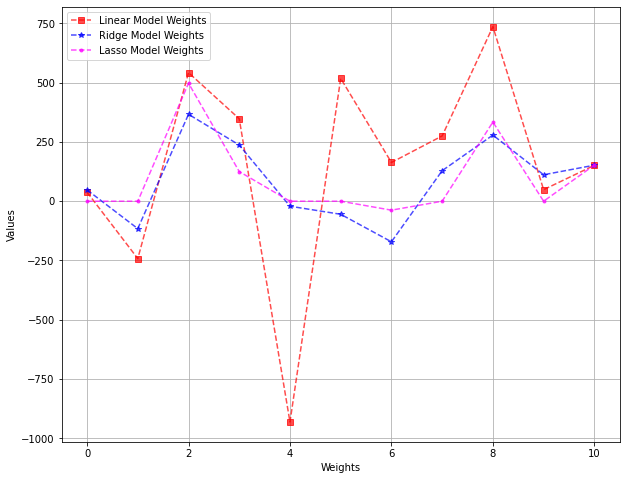

In [19]:
plt.figure(figsize=(10,8))
plt.plot(list(linear_model.coef_) + [linear_model.intercept_], 's--', alpha=0.7, color='red', label='Linear Model Weights')
plt.plot(list(ridge_model.coef_) + [ridge_model.intercept_], '*--', alpha=0.7, color='blue', label='Ridge Model Weights')
plt.plot(list(lasso_model.coef_) + [lasso_model.intercept_], '.--', alpha=0.7, color='magenta', label='Lasso Model Weights')
plt.grid()
plt.xlabel('Weights')
plt.ylabel('Values')
plt.legend()
plt.show()